# Model Relationship

Django offers ways to define the three most common types of database relationships

* One to One Relationship
* Many to One Relationship
* Many to Many Relationship

## One to One Relationship

When one row of table_A can be linked to one row of table_B.

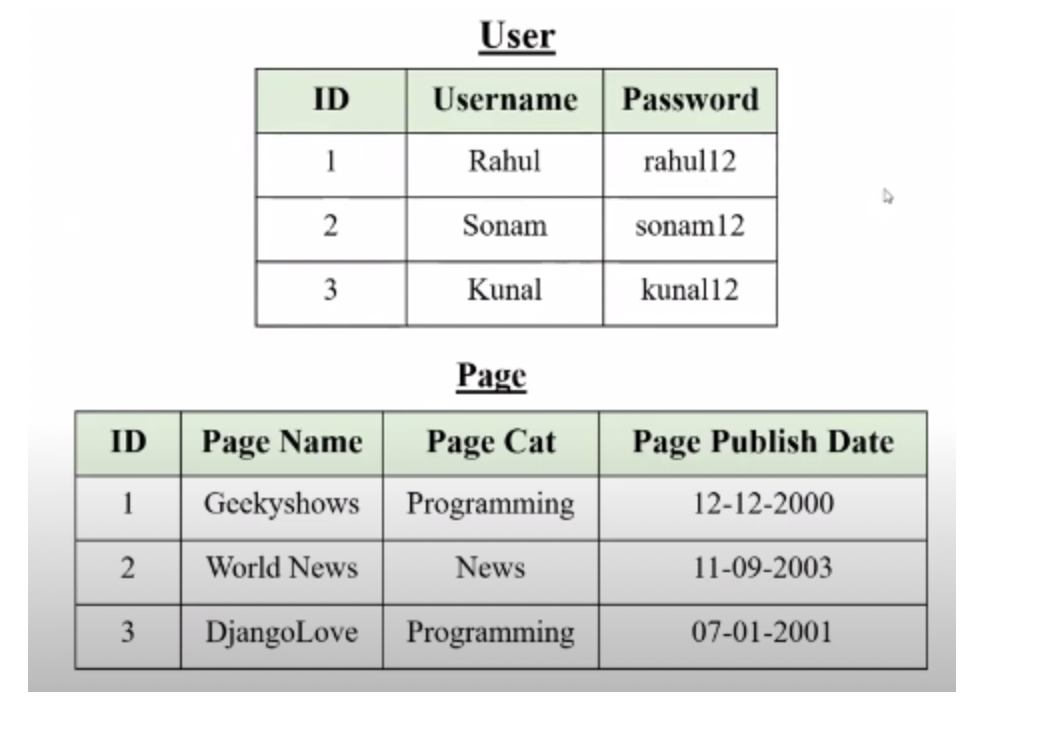

### One to One Relationship

One to One Relationship - To define a one-to-one relationship, use OneToOneField. You use it just like any other Field type by including it as a class attribute of your model.

OneToOne Field requires a positional argument, the class to which the model is related.

**Syntax:-** OneToOneField(to, on_delete, parent_link=False, * *options)

    where,
    
    to - The class to which the model is related.
    
    on_delete - When an object referenced by a ForeignKey is deleted, Django will emulate the behavior of the SQL constraint specified by the on_delete argument. on_delete doesn't create an SQL constraint in the database.
    
    parent_link - When True and used in a model which inherits from another concrete model, indicates that this field should be used as the link back to the parent class, rather the extra OneToOneField which would normally be implicitly created by subclassing.
    
    limit_choices_to - Sets a limit to the available choices for this field when this field is rendered using a ModeForm or the admin(by default, all objects in the queryset are available to choose). Either a dictionary, a Q object, or a callable returing a dictionary or Q object can be used.
    
    related_name - The name to use for the relation from the related object back to this one. It's also the default value for related_query_name (the name to use for the reverse filter name from the target model).
    
    > If you'd prefer Django not to create a backwards relation, set related_name to '+' or end it with '+'.
    
    related_query_name - The name to use for the reverse filter name from the target model. It defaults to the value of related_name or default_related_name if set, otherwise it defaults to the name of the model.
    
    to_field - The field on the related object that the relation is to. By default, Django uses the primary key of the related object. If you reference a different field, that field must have unique=True.
    
    swappable - Controls the migration framework's reaction if this ForeignKey is pointing at a swappable model. If it is True - the default - then if the ForeignKey is pointing at a model which matches the current value of settings. AUTH_USER_MODEL (or another swappable model setting) the relationship will be stored in the migration using a reference to the setting, not to the model directly.
    
    db_constraint - Controls whether or not a constraint should be created in the database for this foreign key. The default is True, and that's almost certainly what you want; setting this to False can be very bad for data integrity. That said, here are some scenarios where you might want to do this:
    
    > You have legacy data that is not valid.
    
    > You're sharding your database.
    
    > If this is set to False, accessing a related object that doesn't exist will raise its DoesNotExist exception.

#### On_delete

on_delete - When an object referenced by a ForeignKey is deleted, Django will emulate the behavior of the SQL constraint specified by the on_delete argument. on_delete doesn't create an SQL constraint in the database.

The possible values for on_delete are found in django.db.models:

    * CASCADE - Cascade deletes. Django emulates the behavior of the SQL constraint ON DELETE CASCADE and also deletes the object containing the ForeignKey.
    
    * PROTECT - Prevent deletion of the referenced object by raising ProtectedError, a subclass of django.db.IntegrityError.
    
    * SET_NULL - Set the ForeignKey null; this is only possible if null is True.
    
    * SET_DEFAULT - Set the ForeignKey to its default value; a default for the ForeignKey must be set.
    
    * SET() - Set the ForeignKey to the value passed to SET(), or if a callable is passed in, the result of calling it.
    
    * DO_NOTHING -Take no action. If your database enforces referential integrity, this will cause an IntegrityError unless you manually add an SQL ON DELETE constraint to the database field.


In [ ]:
# models.py
class User(models.Model):
    user_name = models.CharField(max_length=70)
    password = models.CharField(max_length=70)
    

class Page(models.Model):
    user = models.OneToOneField(User, on_delete=models.CASCADE, primary_key=True)
    #  or
    user = models.OneToOneField(User, on_delete=models.CASCADE, primary_key=True, limit_choices={'is_staff': True})
    page_name = models.CharField(max_length=70)
    page_cat = models.CharField(max_length=70)
    page_publish_date = models.DateField()
    
# singals.py

from .models import Page
from django.db.models.signals import post_delete
from django.dispatch import receiver

@receiver(post_delete, sender=Page)
def delete_related_user(sender, instance, **kwargs):
    print('Page Post_Delete')
    instance.user.delete()
    
    
# apps.py in the class
class MyappConifg(AppConfig):
    name = 'myapp'
    def ready(self):
        import myapp.signals

# __init__.py

default_app_config = 'myapp.apps.MyappConfig'

## Many to One Relationship

When one or more row of table_B can be linked to one row of table A.

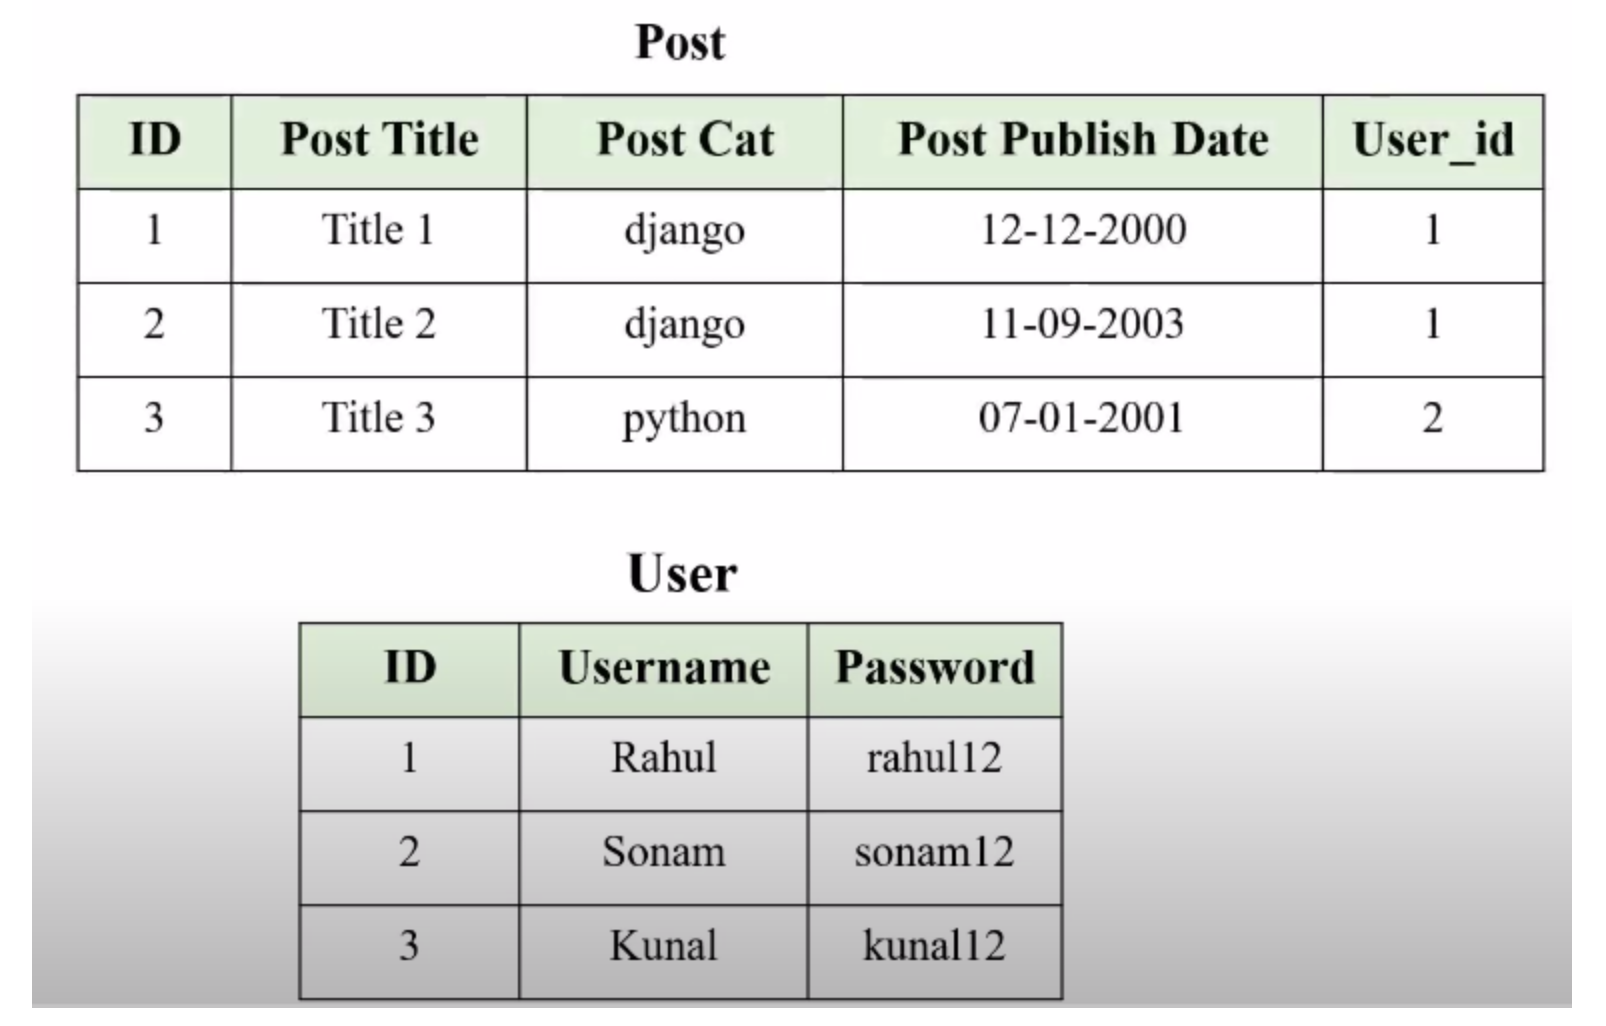

Many to One Relationship - To define a many-to-one relationship, use **ForeignKey**. You use it just like any other Field type: by including it as a class attribute of your model.

A many-to-one-relationship requires two positional arguments: the class to which the model is related and the on_delete option.

* ForeignKey(to, on_delete, * *options)
    
        to - The class to which the model is related.
        
        on_delete - When an object referenced by a ForeignKey is deleted, Django will emulae the behavior of the SQL constraint specified by the on_delete argument. on_delete doesn't create an SQL constraint in the database.
        
        limit_choices_to - Sets a limit to the available choices for this field when this field is rendered using a ModelForm or the admin (by default, all objects in the queryset are available to choose). Either a dictionary, a Q object, or a callable returing a dictionary or Q object can be used.
        
        related_name - The name to use for the relation from the related object back to this one. It's also the default value for related_query_name (the name to use for the reverse filter name from the target model).
        
        > If you'd prefer Django not to create a backwards relation, set related_name to '+' or end it with '+'.
        
         related_query_name - The name to use for the reverse filter name from the target model. It defaults to the value of related_name or default_related_name if set, otherwise it defaults to the name of the model.
        
        to_field - The field on the related object that the relation is to. By deafault, Django uses the primary key of the related object. If you reference a different field, that must have unique=True.
        
        swappable - Controls the migration framework's reaction if this ForeignKey is pointing at a swappable model. If it is True - the default - then if the ForeignKey is pointing at a model which matches the current value of settings. AUTH_USER_MODEL (or another swappable model setting) the relationship will be stored in the migration using a reference to the setting, not to the model directly.
        
        db_constraint - Controls whether or not a constraint should be created in the database for this foreign key. The default is True, and that's almost certainly what you want; setting this to False can be very bad for data integrity. That said, here are some scenarios where you might want to do this:
        
        > You have legacy data that is not valid.
        
        > You're sharding your database.
        
        > It this is set to False, accessing a related object that doesn't exist will raise its DoesNotExist exception.
        

#### On_delete

on_delete - When an object referenced by a ForeignKey is deleted, Django will emulate the behavior of the SQL constraint specified by the on_delete argument. on_delete doesn't create an SQL constraint in the database.

The possible values for on_delete are found in django.db.models:

    * CASCADE - Cascade deletes. Django emulates the behavior of the SQL constraint ON DELETE CASCADE and also deletes the object containing the ForeignKey.
    
    * PROTECT - Prevent deletion of the referenced object by raising ProtectedError, a subclass of django.db.IntegrityError.
    
    * SET_NULL - Set the ForeignKey null; this is only possible if null is True.
    
    * SET_DEFAULT - Set the ForeignKey to its default value; a default for the ForeignKey must be set.
    
    * SET() - Set the ForeignKey to the value passed to SET(), or if a callable is passed in, the result of calling it.
    
    * DO_NOTHING -Take no action. If your database enforces referential integrity, this will cause an IntegrityError unless you manually add an SQL ON DELETE constraint to the database field.   

In [ ]:
# models.py
class User(models.Model):
    user_name = models.CharField(max_length=70)
    password = models.CharField(max_length=70)

class Post(models.Model):
    user = models.ForeignKey(User, on_delete=models.CASCADE)
    post_title = models.CharField(max_length=70)
    post_cat = models.CharField(max_length=70)
    post_publish_date = models.DateField()
    


## Many to Many Relationship

When one row of table_A can be linked to one or more rows of table_B, and vice_versa.

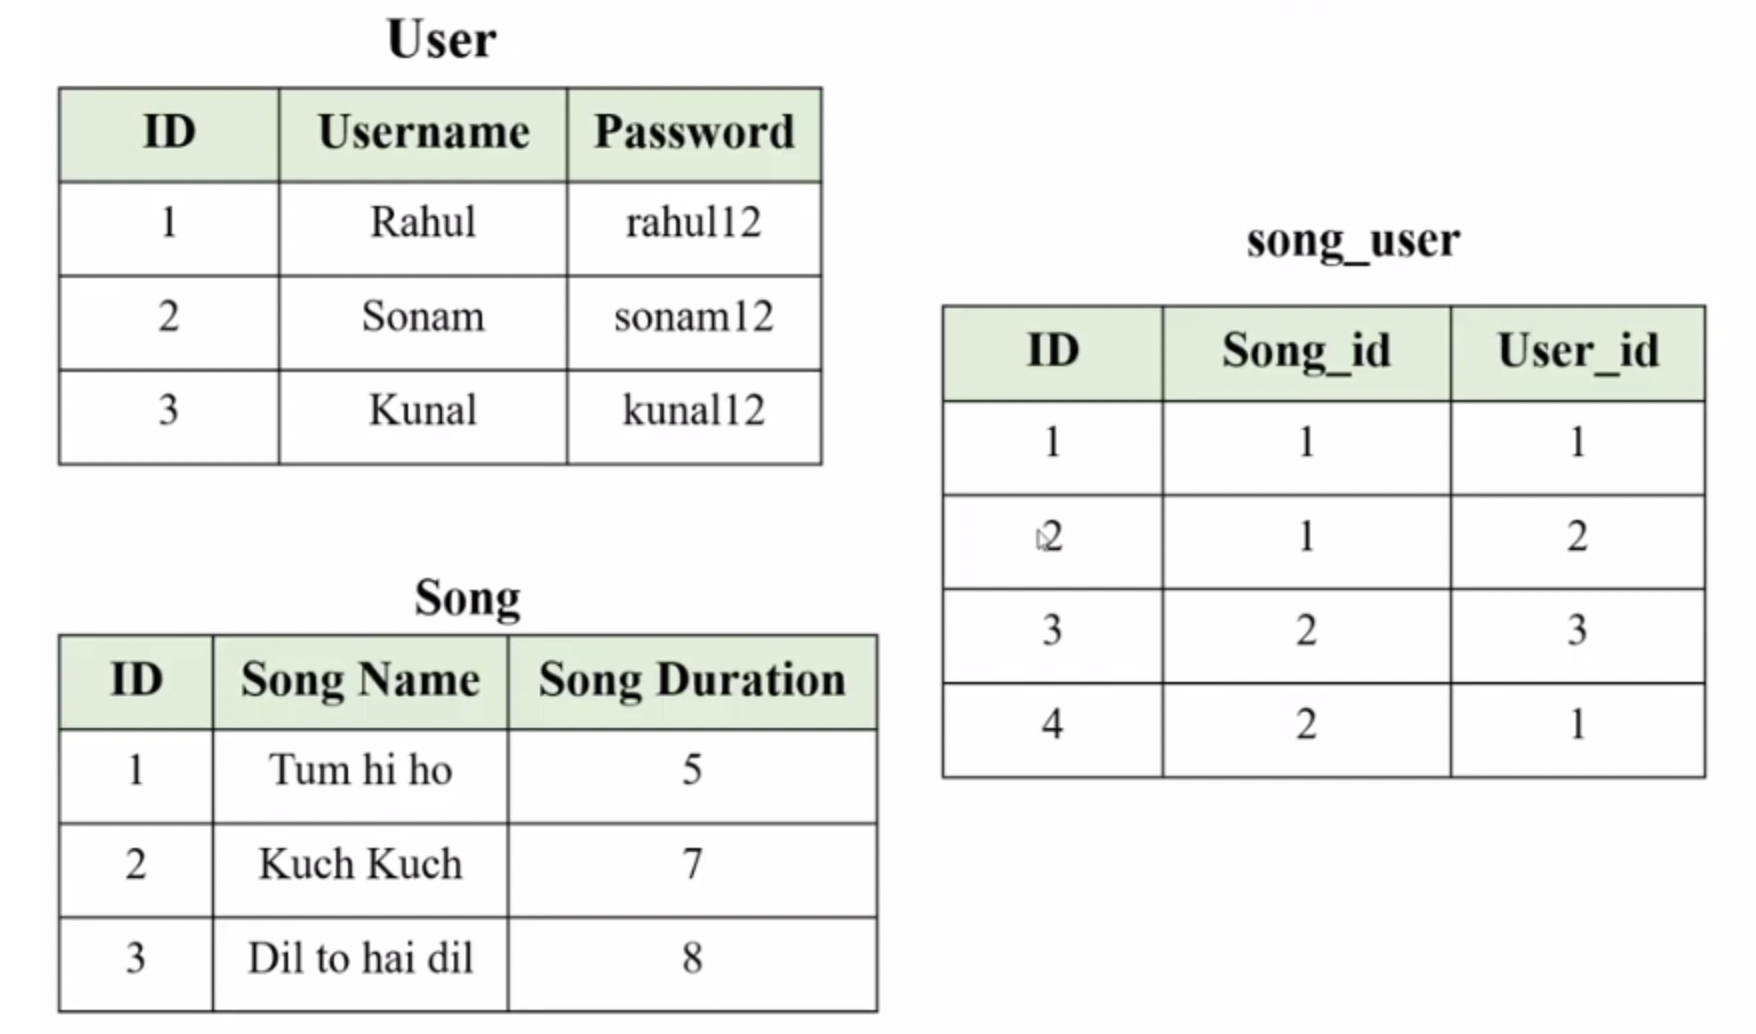

Many to Many Relationships - To define a many-to-many relationship, use **ManyToManyField**. You use it just like any other Field type: by including it as a class attribute of your model.

ManyToManyField requires a positional argument: the class to which the model is related.

**Syntax:-** 
    
    ManyToManyField(to, * *options)
    
    where,
    
    to - The class to which the model is related.
    
    related_name - The name to use for the relation from the related object bank to this one. It's also the default value for related_query_name (the name to use for the reverse filter name from the target model).
    
        > If you'd prefer Django not to create a backwards relation, set related_name to '+' or end it with '+'.
        
    related_query_name - The name to use for the reverse filter name from the target model. It defaults to the value of related_name or default_name if set, otherwise it defaults to the name of the model.   

In [ ]:
#models.py
class User(models.Model):
    user_name = models.CharField(max_length=70)
    password = models.CharField(max_length=70)
    
class Song(models.Model):
    user = models.ManyToManyField(User)
    song_name = models.CharField(max_length=70)
    song_duration = models.IntegerField()    
    
    def written_by(self):
        return ",".join([str(p) for p in self.user.all()])
    
# admin.py
from .models import Song

@admin.register(Song)
class SongAdmin(admin.ModelAdmin):
    list_display = ['song_name', 'song_duration', 'written_by']